In [241]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "../data/mouse_drug_data.csv"
clinical_data = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_df = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
merge_table = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview

merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [242]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group = merge_table.groupby(["Drug", "Timepoint"])
tumor_mean = tumor_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame({"Tumor Mean": tumor_mean})
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean_df.head(20)

Tumor Mean
Drug      Timepoint            
Capomulin 0           45.000000
          5           44.266086
          10          43.084291
          15          42.064317
          20          40.716325
          25          39.939528
          30          38.769339
          35          37.816839
          40          36.958001
          45          36.236114
Ceftamin  0           45.000000
          5           46.503051
          10          48.285125
          15          50.094055
          20          52.157049
          25          54.287674
          30          56.769517
          35          58.827548
          40          61.467895
          45          64.132421

In [243]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = tumor_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_err_df = pd.DataFrame({"Tumor Std Error": tumor_sem})

# Preview DataFrame
tumor_err_df.head(20)

Tumor Std Error
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.448593
          10                0.702684
          15                0.838617
          20                0.909731
          25                0.881642
          30                0.934460
          35                1.052241
          40                1.223608
          45                1.223977
Ceftamin  0                 0.000000
          5                 0.164505
          10                0.236144
          15                0.332053
          20                0.359482
          25                0.439356
          30                0.490620
          35                0.692248
          40                0.708505
          45                0.902358

In [244]:
# Minor Data Munging to Re-Format the Data Frames
mung_df = tumor_mean_df.pivot_table(index="Timepoint", columns="Drug", values="Tumor Mean")
mung_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


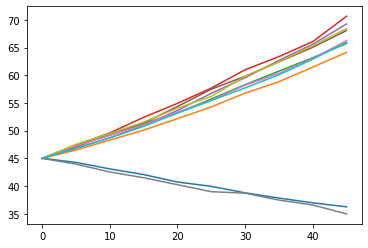

In [246]:
# Generate the Plot (with Error Bars)
mung_graph = plt.plot(mung_df)


## Metastatic Response to Treatment

In [221]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_group = merge_table.groupby(["Drug", "Timepoint"])

meta_mean = meta_group["Metastatic Sites"].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame({"Meta Mean": meta_mean})

# Preview DataFrame
meta_mean_df.head()

Meta Mean
Drug      Timepoint           
Capomulin 0           0.000000
          5           0.160000
          10          0.320000
          15          0.375000
          20          0.652174

In [222]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = tumor_group["Metastatic Sites"].sem()

# Convert to DataFrame
meta_err_df = pd.DataFrame({"Meta Std Error": meta_sem})

# Preview DataFrame
meta_err_df.head()

Meta Std Error
Drug      Timepoint                
Capomulin 0                0.000000
          5                0.074833
          10               0.125433
          15               0.132048
          20               0.161621

In [223]:
# Minor Data Munging to Re-Format the Data Frames
meta_mung_df = meta_mean_df.pivot_table(index="Timepoint", columns="Drug", values="Meta Mean")
meta_mung_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


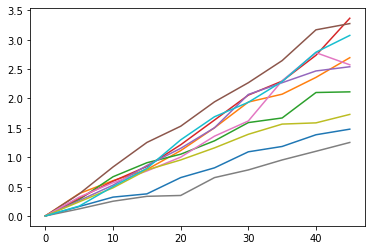

In [224]:
# Generate the Plot (with Error Bars)
meta_mung_graph = plt.plot(meta_mung_df) 


## Survival Rates

In [225]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_group = merge_table.groupby(["Drug", "Timepoint"])

mouse_count = mouse_group["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame({"Mouse Count": mouse_count})

# Preview DataFrame
mouse_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [226]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.pivot_table(index="Timepoint", columns="Drug", values="Mouse Count")
mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


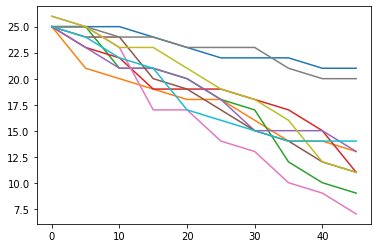

In [227]:
# Generate the Plot (Accounting for percentages)
mouse_count_graph = plt.plot(mouse_count_df) 


## Summary Bar Graph

In [232]:
initial_volume = tumor_mean.loc[tumor_mean["Timepoint"] ==0, ["Drug", "Tumor Volume (mm3)"]]
final_volume = tumor_mean.loc[tumor_mean["Timepoint"] ==45, ["Drug", "Tumor Volume (mm3)"]]

initial = initial_volume.set_index("Drug")
final = final_volume.set_index("Drug") 
pct_change = ((final-initial)/initial)*100

pct_change_summ = pct_change.rename({"Tumor Volume (mm3)": "Tumor Volume Pct. Change"}, axis=1)
round(pct_change_summ, 2)

,Tumor Volume Pct. Change
Drug,
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09


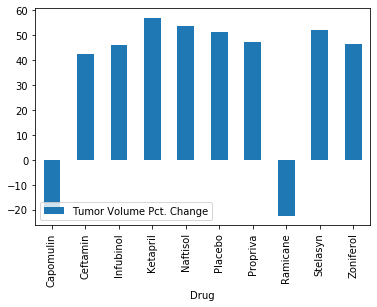

In [235]:
pct_change_summ.plot(kind="bar")
plt.show()